# HR Analytics Project

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Importing the required libraries

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

# Importing the dataset

In [3]:
data=pd.read_csv('HR-Employee-Attrition.csv')
data.head(7)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  

[7 rows x 35 columns]

# Familiarisation with  the Dataset

In [3]:
data.shape

(1470, 35)

The dataset has 1470 rows and 35 coolumns

Checking the data type of the features

In [4]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

# Null Value Analysis

In [7]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null/missing values in the data

In [8]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

This dataset has 1233 rows that belongs to NO and 237 rows which belongs to yes Class

# Encoding the non-numerial Features into numerical

It is important to to convert non numerical features into numerical vector as machine learning algorith understands the numeric value.Therefore we have converted the categorical features into numerical by using label encoder

In [10]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
list1=['Attrition','BusinessTravel','Department','DistanceFromHome','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for val in list1:
    data[val]=Le.fit_transform(data[val].astype(str))

In [11]:
data.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 0   
1   49          0               1        279           1                27   
2   37          1               2       1373           1                11   
3   33          0               1       1392           1                22   
4   27          0               2        591           1                11   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 35 columns]

In the above figure it can be seen that all features are now numeric

# CorRelation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

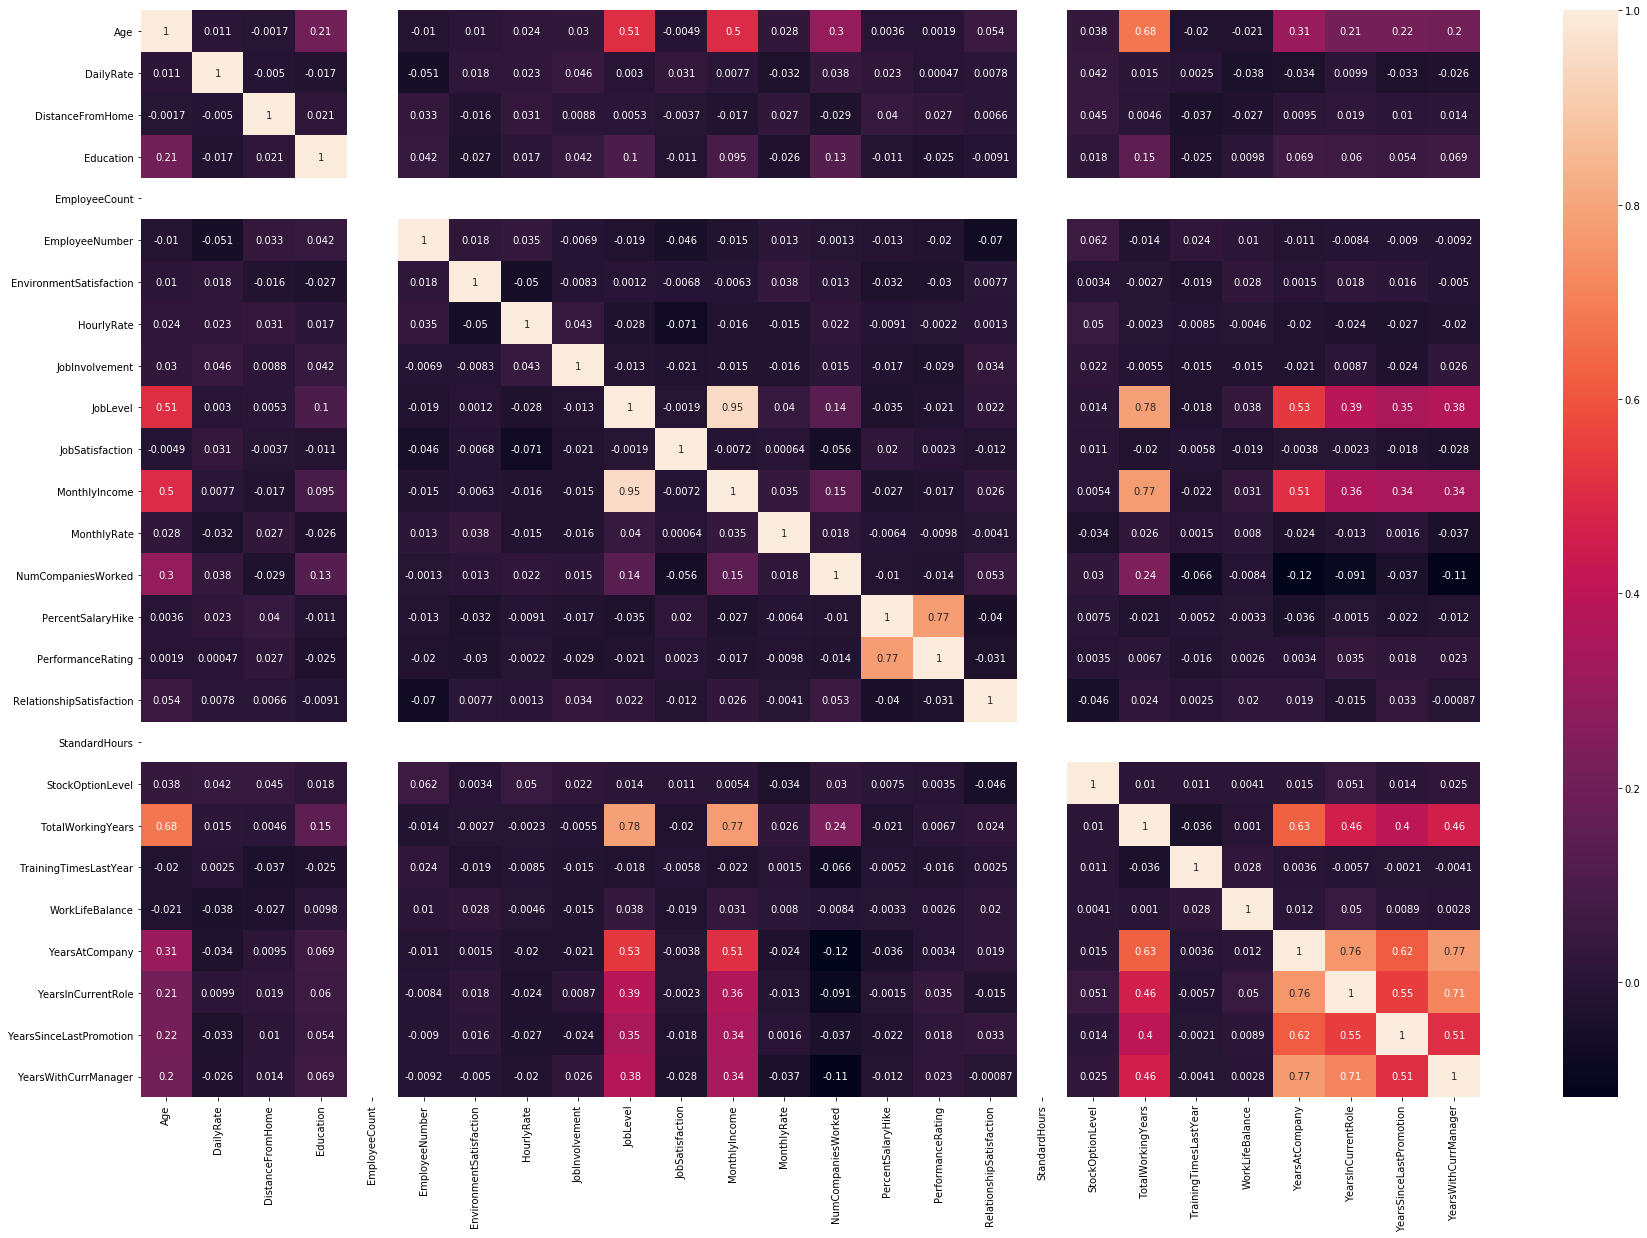

In [4]:
plt.figure(figsize=(30,20))
df_cor=data.corr()
sns.heatmap(df_cor,annot=True)

# Feature selection based on correlation matrix

From the below code I have removed the features which are having correlation of more than 0.6.
This results in stable parameter estimates of classification  which makes it easy to assess the effect of independent variables on dependent variables 

In [14]:
columns = np.full((df_cor.shape[0]),True,dtype=bool)
for i in range(df_cor.shape[0]):
    for j in range(i+1, df_cor.shape[0]):
        if df_cor.iloc[i,j] >= 0.6:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [15]:
data.shape

(1470, 27)

From analysing the correlation matrix we can remove the highly dependent features , 
after removing the features which are correlated with greater >0.6 value we ended up getting 27 features
which will be further taken for the our analysis.

# Univariate analysis

1.Distribution plot.

This plot will display the distribution of the features and will let us know skewness of the dependent variables

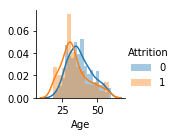

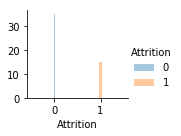

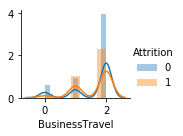

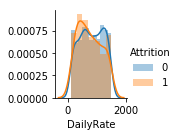

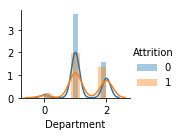

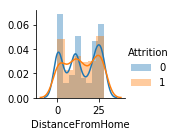

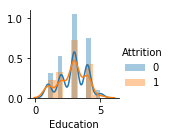

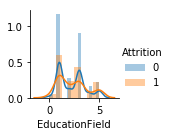

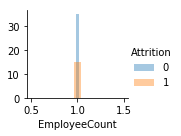

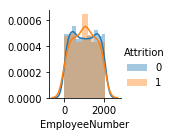

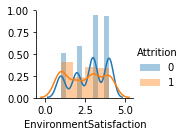

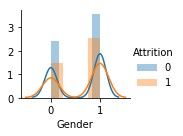

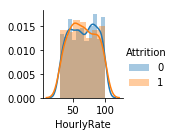

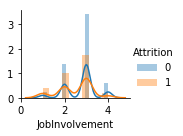

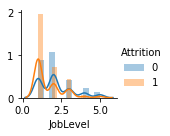

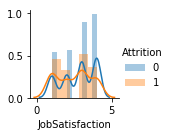

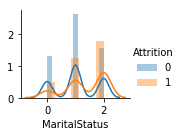

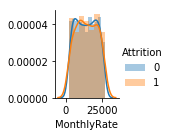

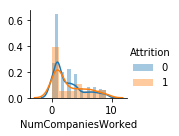

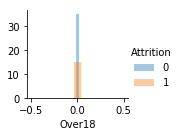

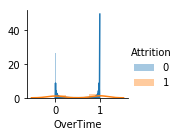

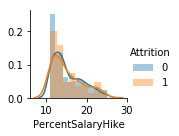

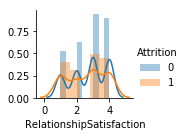

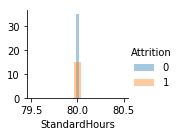

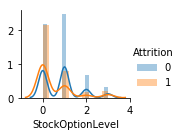

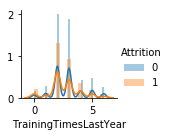

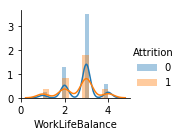

In [16]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns
for val in columns:
#Plotting Probablity Density Function Curve for the age : -
    sns.FacetGrid(data,hue="Attrition",size=2)\
    .map(sns.distplot,val)\
    .add_legend();
plt.show();

From the above curves it can be seen that some features are skewed, the removal of the skewness is important part so to have normalised distribution for the fetaures.
The skewness will be treated below

2.BoxPlot 

The Box plot will help us to identify the outliers in the dataset, if our dataset has significant outliers then those will treated with the help of several techniques.

Lets Check for the outliers!

BoxPlots for the features bases on Attrition


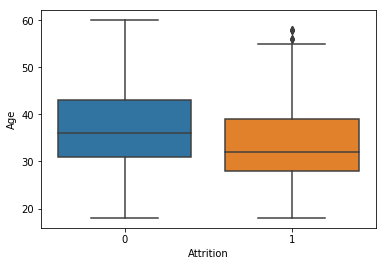

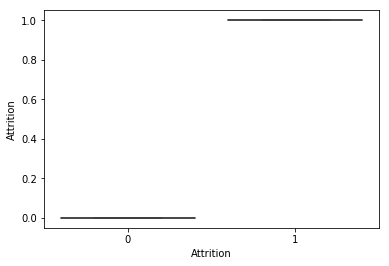

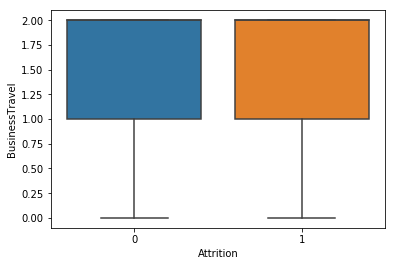

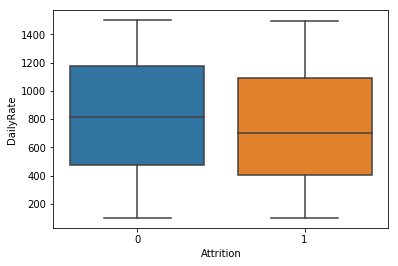

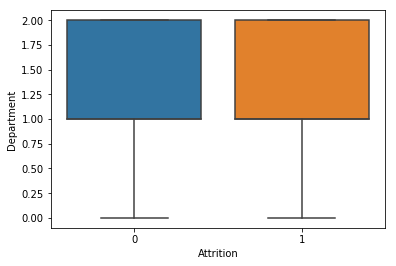

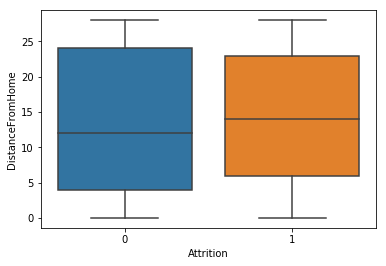

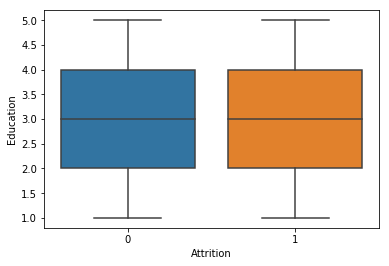

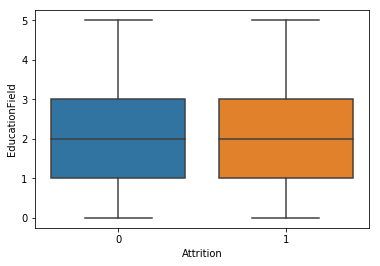

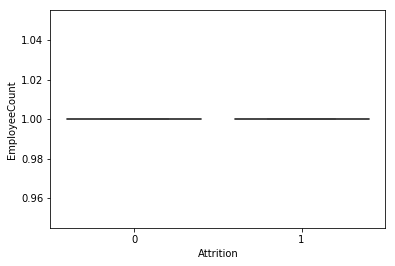

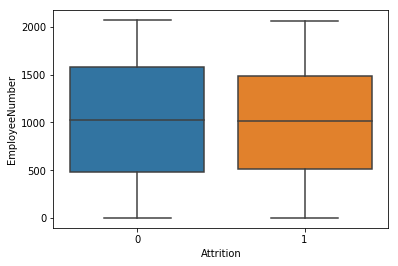

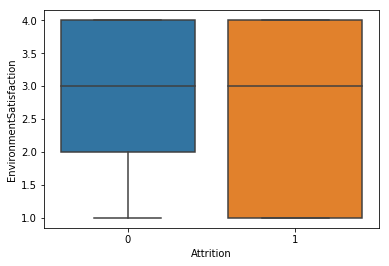

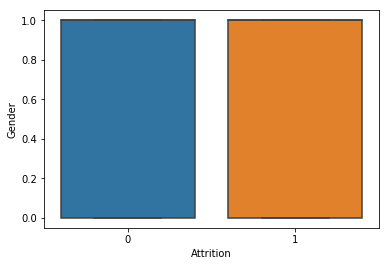

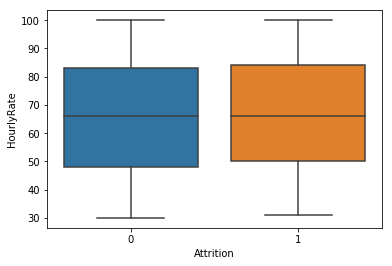

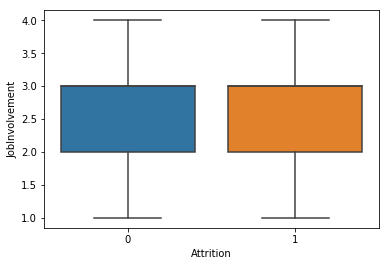

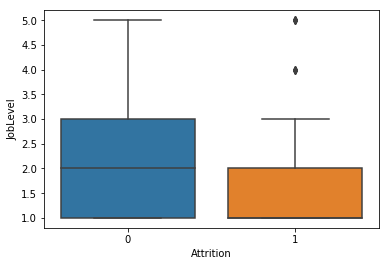

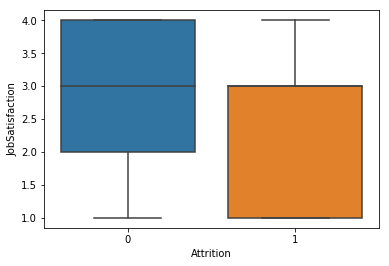

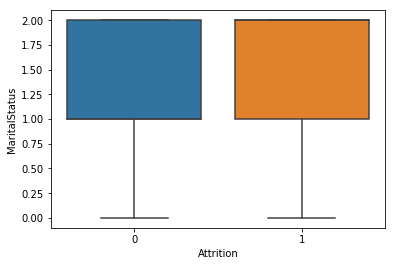

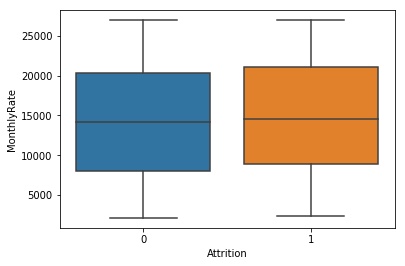

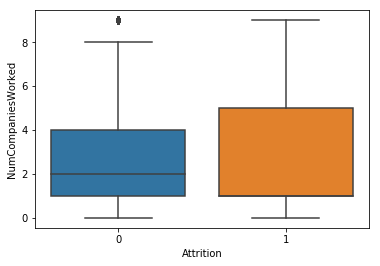

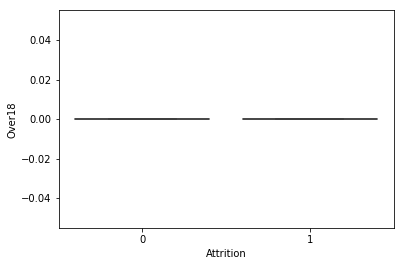

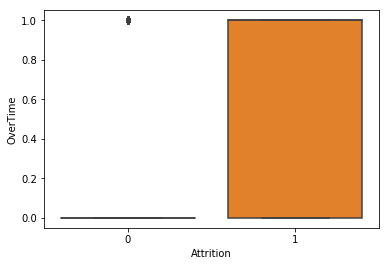

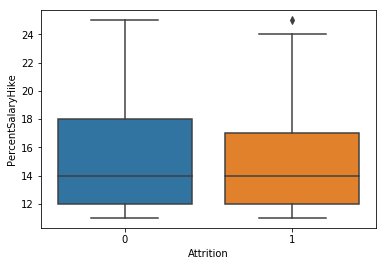

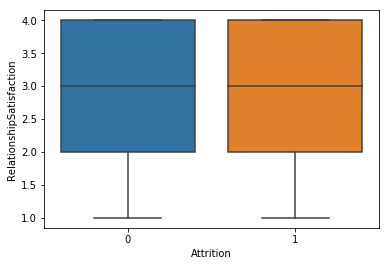

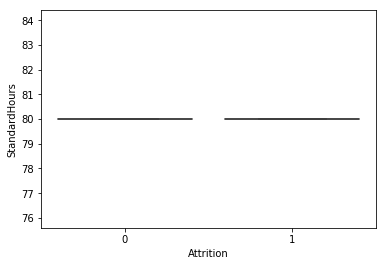

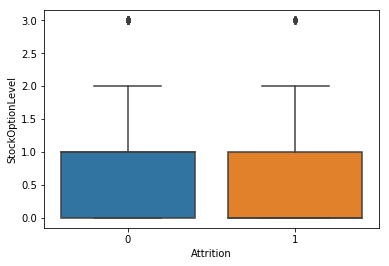

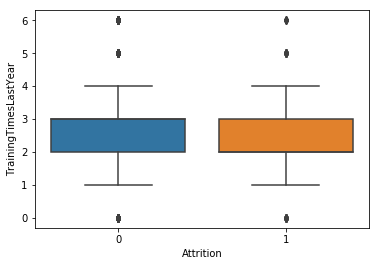

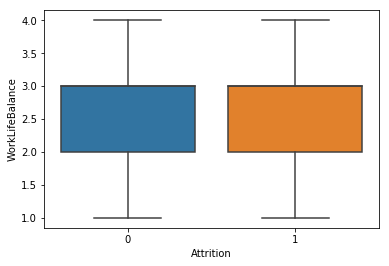

In [17]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns
print('BoxPlots for the features bases on Attrition')
for val in columns:
    sns.boxplot(x='Attrition',y=val,data=data)
    plt.show()

From the above boxplot we can see that this dataset is embedded with very little outliers ,
so this data can be taken for modelling

# BiVariate Analysis

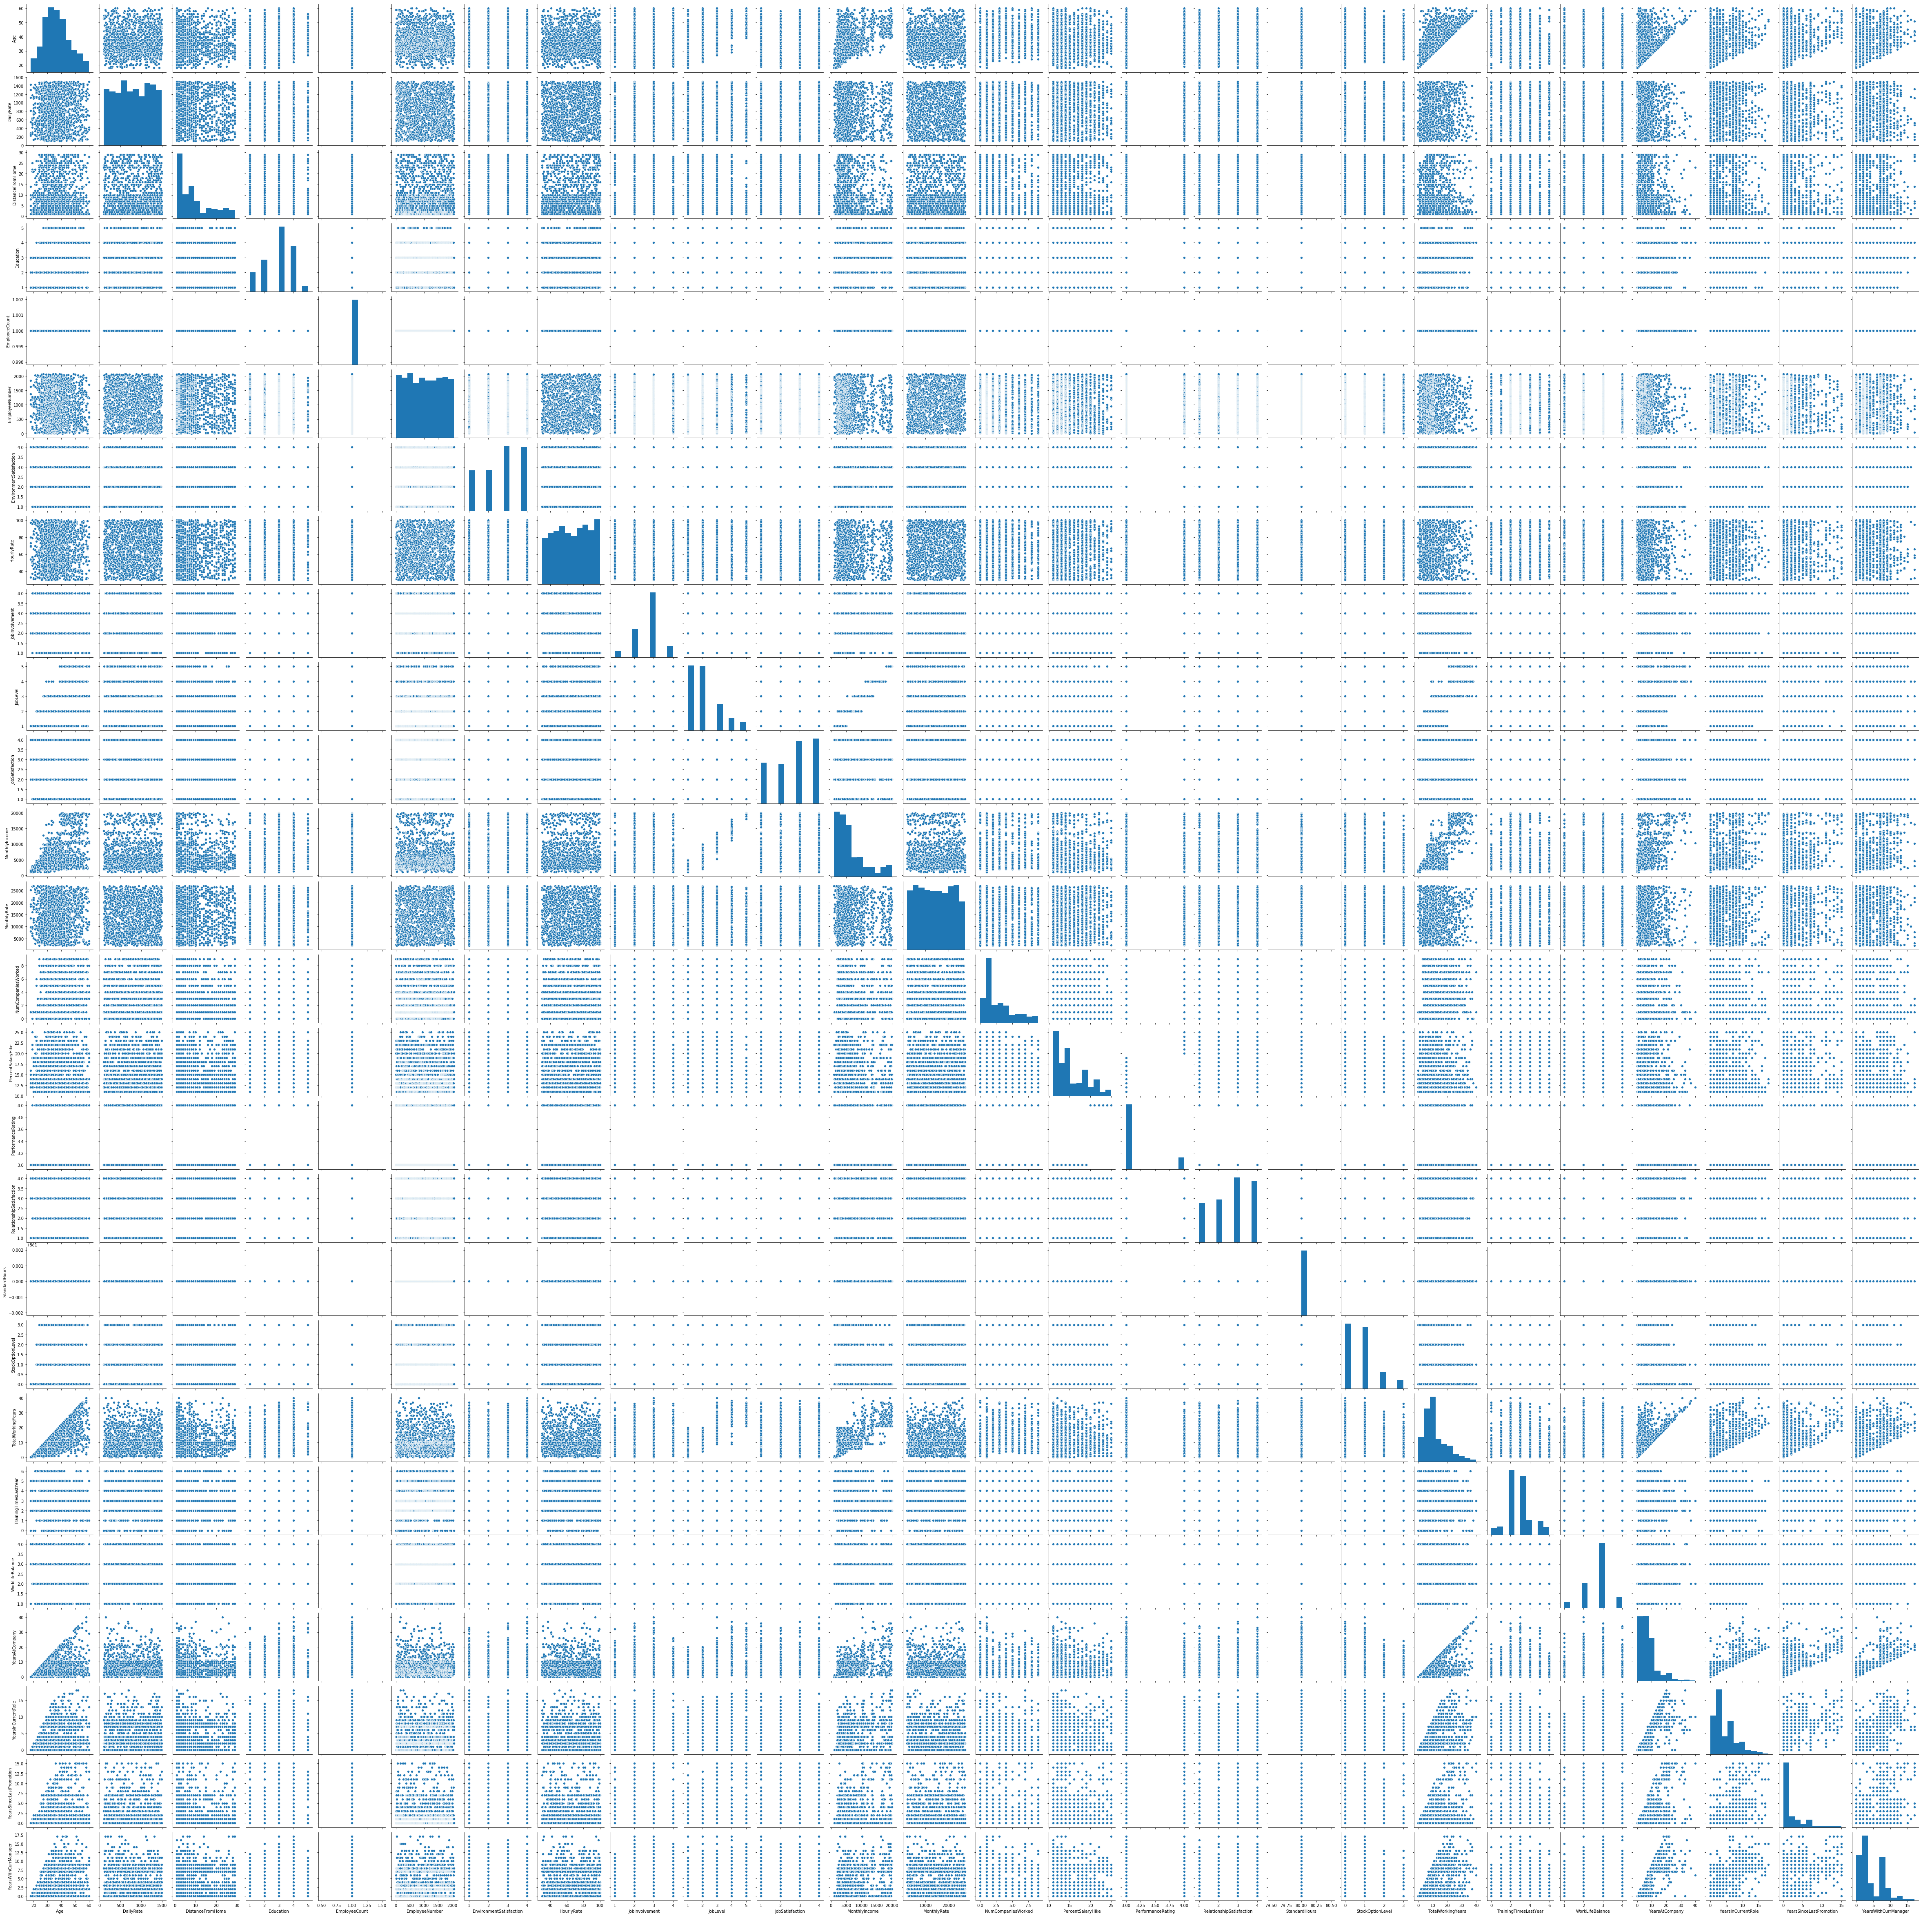

In [6]:
sns.pairplot(data)

# Normalisation of the dataset

Here in this section we will be working upon the skewness ans scaling of the dataset so that our datset gets normalised 
and can be further taken up for the modelling

In [19]:
y=data['Attrition']

In [20]:
x=data.drop(['Attrition'],axis=1)
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41               2       1102           2                 0          2   
1      49               1        279           1                27          1   
2      37               2       1373           1                11          2   
3      33               1       1392           1                22          4   
4      27               2        591           1                11          1   
...   ...             ...        ...         ...               ...        ...   
1465   36               1        884           1                15          2   
1466   39               2        613           1                25          1   
1467   27               2        155           1                23          3   
1468   49               1       1023           2                11          3   
1469   34               2        628           1                27          3   

      EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
0                  1              1               1                        2   
1                  1              1               2                        3   
2                  4              1               4                        4   
3                  1              1               5                        4   
4                  3              1               7                        1   
...              ...            ...             ...                      ...   
1465               3              1            2061                        3   
1466               3              1            2062                        4   
1467               1              1            2064                        2   
1468               3              1            2065                        4   
1469               3              1            2068                        2   

      ...  MonthlyRate  NumCompaniesWorked  Over18  OverTime  \
0     ...        19479                   8       0         1   
1     ...        24907                   1       0         0   
2     ...         2396                   6       0         1   
3     ...        23159                   1       0         1   
4     ...        16632                   9       0         0   
...   ...          ...                 ...     ...       ...   
1465  ...        12290                   4       0         0   
1466  ...        21457                   4       0         0   
1467  ...         5174                   1       0         1   
1468  ...        13243                   2       0         0   
1469  ...        10228                   2       0         0   

      PercentSalaryHike  RelationshipSatisfaction  StandardHours  \
0                    11                         1             80   
1                    23                         4             80   
2                    15                         2             80   
3                    11                         3             80   
4                    12                         4             80   
...                 ...                       ...            ...   
1465                 17                         3             80   
1466                 15                         1             80   
1467                 20                         2             80   
1468                 14                         4             80   
1469                 12                         1             80   

      StockOptionLevel  TrainingTimesLastYear  WorkLifeBalance  
0                    0                      0                1  
1                    1                      3                3  
2                    0                      3                3  
3                    0                      3                3  
4                    1                      3                3  
...                ...                    ...              ...  
1465                 1         

In [21]:
x.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.070955
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
dtype: float64

Removing the skewness of the datset using Log Transformation

In [24]:
for col in x.columns:
    if x.skew().loc[col]>0.55 or x.skew().loc[col]<-0.55:
        x[col]=np.log1p(x[col])

In [25]:
x.skew()

Age                         0.413286
BusinessTravel             -1.815861
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.070955
Education                  -0.289681
EducationField             -0.054786
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.513543
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.271963
TrainingTimesLastYear      -1.075852
WorkLifeBalance            -1.213605
dtype: float64

We can still find the skewness in some variables so we will use StandardScaler for standardisation of the dat

In [26]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)


In [27]:
x=np.array(x)
x

array([[ 0.4463504 ,  0.54737089,  0.74252653, ..., -1.05610617,
        -3.36543527, -2.91431009],
       [ 1.32236521, -0.62998319, -1.2977746 , ...,  0.47128393,
         0.30504942,  0.39004393],
       [ 0.008343  ,  0.54737089,  1.41436324, ..., -1.05610617,
         0.30504942,  0.39004393],
       ...,
       [-1.08667552,  0.54737089, -1.60518328, ...,  0.47128393,
        -3.36543527,  0.39004393],
       [ 1.32236521, -0.62998319,  0.54667746, ..., -1.05610617,
         0.30504942, -0.9813869 ],
       [-0.32016256,  0.54737089, -0.43256792, ..., -1.05610617,
         0.30504942,  1.45380832]])

Now since our data is normalised , we should proceed for the Modelling

The class of the dataset is categorial of two values Yes or No , therefore on that basis  Classification Techniques will be used

# Applying Various Classification Models

In this section we will be applying several classification models and hence we will be checking following performance matrix :

1) Accuracy score

2) AUC Score 

3) Mean of crossing validation score using accuracy as scoring

4) Std Deviation of crossing validation score using accuracy as scoring

5) Confusion Matrix

We have also used GridSearch for tuning the parameters

Importing all the required library

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Function for Accuracy Score

This function is built to find the best accuracy score depending on the random state while splitting the model. This function prints the best accuracy score and returns the random state for that accuracy score

In [29]:
def accur_at_rstate(model,x,y):
    random_state=np.arange(42,101)
    accuracy=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        #DT=DecisionTreeClassifier()
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if accuracy_score(test_y,pred) > accuracy:
            accuracy=accuracy_score(test_y,pred)
            Final_r_state=r_state
        #Calculating 
    print('The maximum accuracy reached is {} at random state {}' .format(accuracy,Final_r_state))
    return Final_r_state

# Function for Auc Score and Confusion Matrix

This function will result in auc score for model and also print the confusion matrix

In [30]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
def roc_curve(model,r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
    fpr_tr,tpr_tr,threshold = metrics.roc_curve(train_y,model.predict_proba(train_x)[:,1])
    fpr_test,tpr_test,threshold = metrics.roc_curve(test_y,model.predict_proba(test_x)[:,1])
    plt.plot(fpr_tr,tpr_tr ,label="train AUC ="+str(metrics.auc(fpr_tr,tpr_tr)))
    plt.plot(fpr_test,tpr_test ,label="test AUC ="+str(metrics.auc(fpr_test,tpr_test)))
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()
    pred=model.predict(test_x)
    sns.heatmap(confusion_matrix(test_y,pred),annot=True)

# 1.KNeighborsClassifier

In [43]:
from sklearn.model_selection import GridSearchCV
neighbour={'n_neighbors':range(1,50),'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
Knn=KNeighborsClassifier()
gs=GridSearchCV(Knn,neighbour,cv=10)
gs.fit(x,y)
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 19}

The maximum accuracy reached is 0.8707482993197279 at random state 55
Cross_val_score  0.8435374149659864


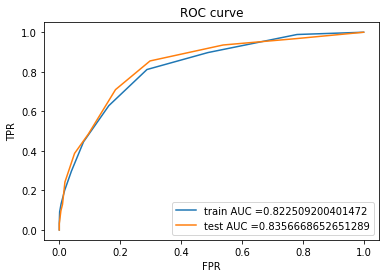

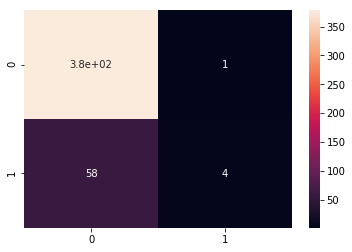

In [45]:
from sklearn.model_selection import cross_val_score
Knn=KNeighborsClassifier(n_neighbors=19,algorithm='auto')
Final_Random_state=accur_at_rstate(Knn,x,y)
print('Cross_val_score ',cross_val_score(Knn,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(Knn,Final_Random_state)

# 2.DecisionTreeClassifier

In [34]:
depth={'max_depth':range(0,30)}
DT=DecisionTreeClassifier()
gs=GridSearchCV(DT,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 3}

The maximum accuracy reached is 0.8231292517006803 at random state 86
Cross_val_score  0.7755102040816326


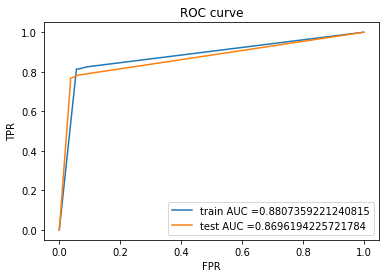

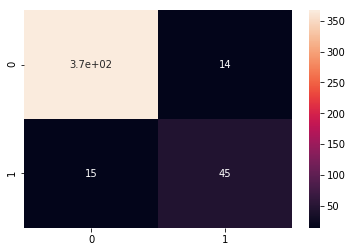

In [35]:
DT=DecisionTreeClassifier(max_depth=14)
Final_Random_state=accur_at_rstate(DT,x,y)
print('Cross_val_score ',cross_val_score(DT,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(DT,Final_Random_state)

# 3.Support Vector Classifier

In [36]:
gamma={'gamma':range(1,30),'kernel':['Poly','rbf']}
svc=SVC()
gs=GridSearchCV(svc,gamma,cv=10)
gs.fit(x,y)
gs.best_params_

{'gamma': 1, 'kernel': 'rbf'}

In [38]:
svc=SVC(gamma=1,kernel='rbf')
Final_Random_state=accur_at_rstate(svc,x,y)
print('Cross_val_score ',cross_val_score(svc,x,y,cv=5 ,scoring='accuracy').mean())


The maximum accuracy reached is 0.8662131519274376 at random state 67
Cross_val_score  0.8387755102040817


# 4.Naive Bayes

In [39]:
#as we are on working classification data set , BernoulliNB will be used for modelling
from sklearn.naive_bayes import BernoulliNB
alpha={'alpha':range(1,30)}
NB=BernoulliNB()
gs=GridSearchCV(NB,alpha,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 8}

The maximum accuracy reached is 0.8934240362811792 at random state 86
Cross_val_score  0.8598639455782312


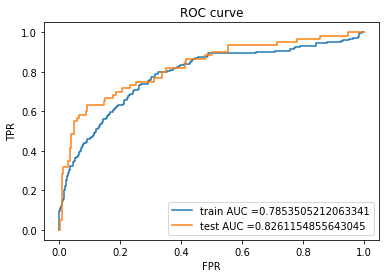

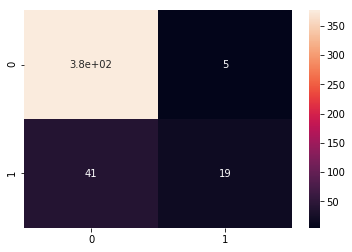

In [40]:
NB=BernoulliNB(alpha=8)
Final_Random_state=accur_at_rstate(NB,x,y)
print('Cross_val_score ',cross_val_score(NB,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(NB,Final_Random_state)

# Logistic Regression

In [46]:
C={'C':range(1,30),'penalty':['l1', 'l2', 'elasticnet']}
log=LogisticRegression()
gs=GridSearchCV(log,C,cv=10)
gs.fit(x,y)
gs.best_params_

{'C': 15, 'penalty': 'l2'}

The maximum accuracy reached is 0.8956916099773242 at random state 93
Cross_val_score  0.864625850340136


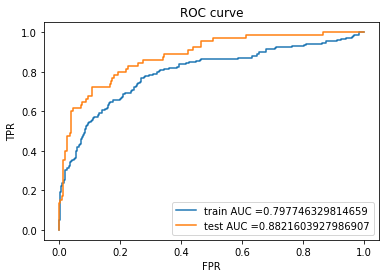

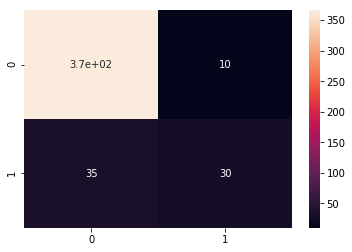

In [47]:
log=LogisticRegression(C=15,penalty='l2')
Final_Random_state=accur_at_rstate(log,x,y)
print('Cross_val_score ',cross_val_score(log,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(log,Final_Random_state)

# Appying ensemble model for better results

# 1.RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':range(1,50),'max_depth':range(1,30),}
RF=RandomForestClassifier()
gs=GridSearchCV(RF,parameters,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 28, 'n_estimators': 39}

The maximum accuracy reached is 0.8820861678004536 at random state 86
Cross_val_score  0.8571428571428571


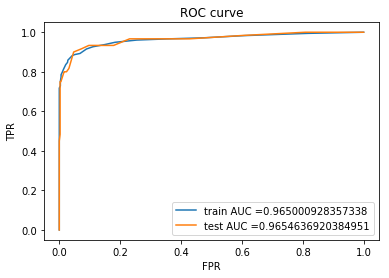

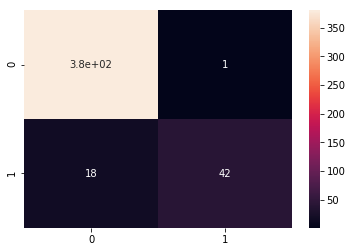

In [49]:
RF=RandomForestClassifier(n_estimators=39,max_depth=28)
Final_Random_state=accur_at_rstate(RF,x,y)
print('Cross_val_score ',cross_val_score(RF,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(RF,Final_Random_state)

# 2.BaggingClassifier

In [50]:
from sklearn.ensemble import BaggingClassifier
parameters={'n_estimators':range(1,30),'base_estimator':[log,NB,svc,Knn,DT]}
RF=BaggingClassifier()
gs=GridSearchCV(RF,parameters,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': LogisticRegression(C=15, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False), 'n_estimators': 29}

The maximum accuracy reached is 0.8888888888888888 at random state 57
Cross_val_score  0.8639455782312926


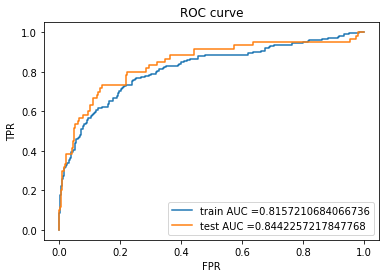

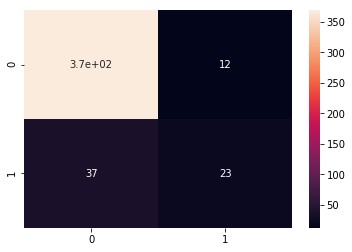

In [51]:
BG=BaggingClassifier(n_estimators=28,base_estimator=log)
Final_Random_state=accur_at_rstate(BG,x,y)
print('Cross_val_score ',cross_val_score(BG,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(BG,Final_Random_state)

# Final Model--LogisticRegression

After performing several classification models on this data set and after analysing the performance matrix for all the models , it is concluded that LogisticRegression is giving the best results which are as follows :

The maximum accuracy reached is 0.8956916099773242 at random state 93
Cross_val_score  0.864625850340136
Test Auc =0.88

Therefore LogisticRegression is selected as our final model

Accuracy 0.8956916099773242
--------------------------------------


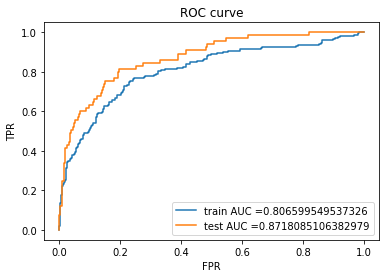

-----------------Confusion Matrix---------------------


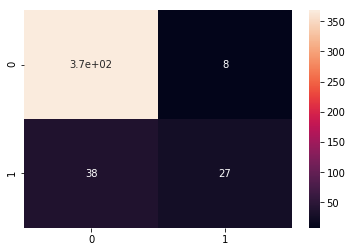

In [54]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=93)
log=LogisticRegression(C=15,penalty='l2')
log.fit(train_x,train_y)
pred = log.predict(test_x)
print('Accuracy',accuracy_score(test_y,pred))
print('--------------------------------------')
roc_curve(log,93)
print('-----------------Confusion Matrix---------------------')


In [55]:
print('classification Report \n',classification_report(test_y,pred))

classification Report 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       376
           1       0.77      0.42      0.54        65

    accuracy                           0.90       441
   macro avg       0.84      0.70      0.74       441
weighted avg       0.89      0.90      0.88       441



In [58]:
print('mean cross_val_score',cross_val_score(log,x,y,cv=5,scoring='accuracy').mean())
print('std deviation of cross_val_score',cross_val_score(log,x,y,cv=5,scoring='accuracy').std())

mean cross_val_score 0.864625850340136
std deviation of cross_val_score 0.020111218366114944


# Saving the model

In [59]:
from sklearn.externals import joblib
joblib.dump(log,"log_attrition.pkl")

['log_attrition.pkl']

# Conclusion :-


In this project we  have found that this is dataset is classification driven dataset as output class is binary , i.e yes or no.

In this project we have performed Null value analysis ,Univariate analysis ,Bivariate analysis amd several EDA techniques.

We have also scale the data in order to remove the skewness and at last we have performed several clasiification algorith and based on the Accuracy We have finalised Logistic regression as the best model for this dataset  and we also check the cross validate score for this model in order to check underfit/Overfit of the data.

At last we have saved the model